In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)

In [4]:
df = pd.read_csv("Indus_Therm_Clean.csv")
df

,COMMUNITY AREA NAME,BUILDING TYPE,BUILDING_SUBTYPE,THERM JANUARY 2010,THERM FEBRUARY 2010,THERM MARCH 2010,TERM APRIL 2010,THERM MAY 2010,THERM JUNE 2010,THERM JULY 2010,THERM AUGUST 2010,THERM SEPTEMBER 2010,THERM OCTOBER 2010,THERM NOVEMBER 2010,THERM DECEMBER 2010,TOTAL THERMS
0,Near West Side,Industrial,Industrial,3253.0,3356,2334,702,175,34,32,32,34,49,208,1685.0,11894
1,North Lawndale,Industrial,Industrial,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0
2,Brighton Park,Industrial,Industrial,0.0,28683,11945,2780,81,5,1,0,0,0,0,78.0,43573
3,Hermosa,Industrial,Industrial,0.0,7225,8062,687,2,208,32,34,34,142,1141,6023.0,23590
4,Brighton Park,Industrial,Industrial,6279.0,5466,4906,1505,484,86,0,1,0,16,450,2803.0,21996
5,North Lawndale,Industrial,Industrial,2505.0,3313,2372,787,150,38,86,38,8,156,100,1786.0,11339
6,Near West Side,Industrial,Industrial,2325.5,26720,15316,4184,2361,12,9,8,9,1213,14176,1506.5,67840
7,Albany Park,Industrial,Industrial,2146.0,1963,1967,1038,681,475,336,344,486,549,621,1227.0,11833
8,Archer Heights,Industrial,Industrial,955.0,815,713,586,442,367,363,328,330,330,402,651.0,6282
9,Armour Square,Industrial,Industrial,5200.0,0,7012,1279,942,872,777,836,833,944,2678,5563.0,26936


In [5]:
df.describe()

,THERM JANUARY 2010,THERM FEBRUARY 2010,THERM MARCH 2010,TERM APRIL 2010,THERM MAY 2010,THERM JUNE 2010,THERM JULY 2010,THERM AUGUST 2010,THERM SEPTEMBER 2010,THERM OCTOBER 2010,THERM NOVEMBER 2010,THERM DECEMBER 2010,TOTAL THERMS
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,3305.226190,4307.571429,3911.642857,1744.833333,1348.761905,784.380952,650.357143,632.642857,660.428571,994.857143,1892.476190,3274.011905,23507.190476
std,4900.355152,6964.733988,5972.966501,3300.006141,3359.833981,2486.062397,2601.969581,2450.690284,2581.104832,2897.690944,4150.077209,5931.517916,41474.530671
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,569.000000,541.250000,651.250000,210.250000,90.250000,28.000000,17.000000,18.250000,9.500000,44.000000,187.750000,536.000000,3290.750000
50%,1379.000000,1740.000000,1441.000000,636.500000,212.500000,78.500000,32.500000,33.500000,32.500000,138.000000,390.000000,1348.500000,9965.000000
75%,3540.000000,4184.000000,4541.000000,1276.750000,662.500000,224.500000,205.250000,206.250000,172.000000,248.750000,1023.750000,2733.000000,21141.250000
max,25574.000000,28683.000000,28136.000000,15883.000000,15719.000000,14051.000000,16030.000000,15255.000000,15821.000000,16221.000000,17612.000000,26673.000000,221908.000000


In [7]:
for col in df.columns[3:15]:
    sd = df.loc[:,col].std()
    mn = df.loc[:,col].mean()
    for row in range(len(df)):
        df.loc[row,col] = (df.loc[row,col] - mn)/sd

In [8]:
df

,COMMUNITY AREA NAME,BUILDING TYPE,BUILDING_SUBTYPE,THERM JANUARY 2010,THERM FEBRUARY 2010,THERM MARCH 2010,TERM APRIL 2010,THERM MAY 2010,THERM JUNE 2010,THERM JULY 2010,THERM AUGUST 2010,THERM SEPTEMBER 2010,THERM OCTOBER 2010,THERM NOVEMBER 2010,THERM DECEMBER 2010,TOTAL THERMS
0,Near West Side,Industrial,Industrial,-0.010658,-0.136627,-0.264131,-0.316010,-0.349351,-0.301835,-0.237650,-0.245091,-0.242698,-0.326418,-0.405890,-0.267893,11894
1,North Lawndale,Industrial,Industrial,-0.674487,-0.618483,-0.654891,-0.528736,-0.401437,-0.315511,-0.249948,-0.258149,-0.255870,-0.343328,-0.456010,-0.551969,0
2,Brighton Park,Industrial,Industrial,-0.674487,3.499836,1.344953,0.313686,-0.377329,-0.313500,-0.249564,-0.258149,-0.255870,-0.343328,-0.456010,-0.538819,43573
3,Hermosa,Industrial,Industrial,-0.674487,0.418886,0.694857,-0.320555,-0.400842,-0.231845,-0.237650,-0.244275,-0.242698,-0.294323,-0.181075,0.463454,23590
4,Brighton Park,Industrial,Industrial,0.606849,0.166328,0.166476,-0.072677,-0.257382,-0.280919,-0.249948,-0.257741,-0.255870,-0.337806,-0.347578,-0.079408,21996
5,North Lawndale,Industrial,Industrial,-0.163300,-0.142801,-0.257769,-0.290252,-0.356792,-0.300226,-0.216896,-0.242643,-0.252771,-0.289492,-0.431914,-0.250865,11339
6,Near West Side,Industrial,Industrial,-0.199930,3.217988,1.909329,0.739140,0.301276,-0.310684,-0.246489,-0.254884,-0.252384,0.075282,2.959830,-0.297986,67840
7,Albany Park,Industrial,Industrial,-0.236560,-0.336635,-0.325574,-0.214192,-0.198748,-0.124446,-0.120815,-0.117780,-0.067579,-0.153866,-0.306374,-0.345108,11833
8,Archer Heights,Industrial,Industrial,-0.479603,-0.501465,-0.535520,-0.351161,-0.269883,-0.167888,-0.110438,-0.124309,-0.128018,-0.229444,-0.359144,-0.442216,6282
9,Armour Square,Industrial,Industrial,0.386661,-0.618483,0.519065,-0.141161,-0.121066,0.035244,0.048672,0.082980,0.066860,-0.017551,0.189279,0.385903,26936


In [9]:
df = pd.read_csv("Indus_Elect_Clean.csv")
df

,COMMUNITY AREA NAME,BUILDING TYPE,BUILDING_SUBTYPE,THERM JANUARY 2010,THERM FEBRUARY 2010,THERM MARCH 2010,TERM APRIL 2010,THERM MAY 2010,THERM JUNE 2010,THERM JULY 2010,THERM AUGUST 2010,THERM SEPTEMBER 2010,THERM OCTOBER 2010,THERM NOVEMBER 2010,THERM DECEMBER 2010,TOTAL THERMS
0,Near West Side,Industrial,Industrial,3253,3356,2334,702,175,34,32,32,34,49,208,1685,11894
1,North Lawndale,Industrial,Industrial,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Brighton Park,Industrial,Industrial,38101,28683,11945,2780,81,5,1,0,0,0,0,78,81674
3,Hermosa,Industrial,Industrial,0,7225,8062,687,2,208,32,34,34,142,1141,6023,23590
4,Brighton Park,Industrial,Industrial,6279,5466,4906,1505,484,86,0,1,0,16,450,2803,21996
5,North Lawndale,Industrial,Industrial,2505,3313,2372,787,150,38,86,38,8,156,100,1786,11339
6,Near West Side,Industrial,Industrial,35542,26720,15316,4184,2361,12,9,8,9,1213,14176,30232,129782
7,Albany Park,Industrial,Industrial,2146,1963,1967,1038,681,475,336,344,486,549,621,1227,11833
8,Archer Heights,Industrial,Industrial,955,815,713,586,442,367,363,328,330,330,402,651,6282
9,Armour Square,Industrial,Industrial,5200,0,7012,1279,942,872,777,836,833,944,2678,5563,26936


In [10]:
df.describe()

,THERM JANUARY 2010,THERM FEBRUARY 2010,THERM MARCH 2010,TERM APRIL 2010,THERM MAY 2010,THERM JUNE 2010,THERM JULY 2010,THERM AUGUST 2010,THERM SEPTEMBER 2010,THERM OCTOBER 2010,THERM NOVEMBER 2010,THERM DECEMBER 2010,TOTAL THERMS
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,5630.761905,4954.142857,3911.642857,1744.833333,1348.761905,784.380952,650.357143,632.642857,660.428571,994.857143,1892.476190,3957.952381,27163.238095
std,9593.030051,8120.133129,5972.966501,3300.006141,3359.833981,2486.062397,2601.969581,2450.690284,2581.104832,2897.690944,4150.077209,7235.518064,48566.634398
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,748.500000,541.250000,651.250000,210.250000,90.250000,28.000000,17.000000,18.250000,9.500000,44.000000,187.750000,536.000000,3290.750000
50%,1862.500000,1740.000000,1441.000000,636.500000,212.500000,78.500000,32.500000,33.500000,32.500000,138.000000,390.000000,1348.500000,9965.000000
75%,4894.000000,4262.000000,4541.000000,1276.750000,662.500000,224.500000,205.250000,206.250000,172.000000,248.750000,1023.750000,3242.500000,21141.250000
max,38101.000000,31366.000000,28136.000000,15883.000000,15719.000000,14051.000000,16030.000000,15255.000000,15821.000000,16221.000000,17612.000000,30232.000000,221908.000000


In [11]:
for col in df.columns[3:15]:
    sd = df.loc[:,col].std()
    mn = df.loc[:,col].mean()
    for row in range(len(df)):
        df.loc[row,col] = (df.loc[row,col] - mn)/sd

In [22]:
df

,COMMUNITY AREA NAME,BUILDING TYPE,BUILDING_SUBTYPE,THERM JANUARY 2010,THERM FEBRUARY 2010,THERM MARCH 2010,TERM APRIL 2010,THERM MAY 2010,THERM JUNE 2010,THERM JULY 2010,THERM AUGUST 2010,THERM SEPTEMBER 2010,THERM OCTOBER 2010,THERM NOVEMBER 2010,THERM DECEMBER 2010,TOTAL THERMS
0,Near West Side,Industrial,Industrial,-0.247863,-0.196812,-0.264131,-0.316010,-0.349351,-0.301835,-0.237650,-0.245091,-0.242698,-0.326418,-0.405890,-0.314138,11894
1,North Lawndale,Industrial,Industrial,-0.586964,-0.610106,-0.654891,-0.528736,-0.401437,-0.315511,-0.249948,-0.258149,-0.255870,-0.343328,-0.456010,-0.547017,0
2,Brighton Park,Industrial,Industrial,3.384774,2.922225,1.344953,0.313686,-0.377329,-0.313500,-0.249564,-0.258149,-0.255870,-0.343328,-0.456010,-0.536237,81674
3,Hermosa,Industrial,Industrial,-0.586964,0.279658,0.694857,-0.320555,-0.400842,-0.231845,-0.237650,-0.244275,-0.242698,-0.294323,-0.181075,0.285404,23590
4,Brighton Park,Industrial,Industrial,0.067574,0.063036,0.166476,-0.072677,-0.257382,-0.280919,-0.249948,-0.257741,-0.255870,-0.337806,-0.347578,-0.159623,21996
5,North Lawndale,Industrial,Industrial,-0.325837,-0.202108,-0.257769,-0.290252,-0.356792,-0.300226,-0.216896,-0.242643,-0.252771,-0.289492,-0.431914,-0.300179,11339
6,Near West Side,Industrial,Industrial,3.118018,2.680480,1.909329,0.739140,0.301276,-0.310684,-0.246489,-0.254884,-0.252384,0.075282,2.959830,3.631260,129782
7,Albany Park,Industrial,Industrial,-0.363260,-0.368361,-0.325574,-0.214192,-0.198748,-0.124446,-0.120815,-0.117780,-0.067579,-0.153866,-0.306374,-0.377437,11833
8,Archer Heights,Industrial,Industrial,-0.487412,-0.509738,-0.535520,-0.351161,-0.269883,-0.167888,-0.110438,-0.124309,-0.128018,-0.229444,-0.359144,-0.457044,6282
9,Armour Square,Industrial,Industrial,-0.044904,-0.610106,0.519065,-0.141161,-0.121066,0.035244,0.048672,0.082980,0.066860,-0.017551,0.189279,0.221829,26936


In [27]:
stats.norm.cdf(df.loc[29,"THERM JANUARY 2010"])

0.31486885749657767

In [29]:
df = pd.read_csv("Comm_Therm_Clean.csv")
df

,COMMUNITY AREA NAME,BUILDING TYPE,BUILDING_SUBTYPE,THERM JANUARY 2010,THERM FEBRUARY 2010,THERM MARCH 2010,TERM APRIL 2010,THERM MAY 2010,THERM JUNE 2010,THERM JULY 2010,THERM AUGUST 2010,THERM SEPTEMBER 2010,THERM OCTOBER 2010,THERM NOVEMBER 2010,THERM DECEMBER 2010,TOTAL THERMS
0,Auburn Gresham,Commercial,Multi < 7,1561.0,1388.0,1507.0,701.0,486.0,380.0,18.0,16.0,0.0,0.0,0.0,0.0,6057
1,Austin,Commercial,Multi < 7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,391.0,400
2,Austin,Commercial,Multi < 7,310.0,268.0,163.0,77.0,57.0,23.0,19.0,8.0,14.0,10.0,0.0,0.0,949
3,Austin,Commercial,Commercial,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,Austin,Commercial,Commercial,3041.0,2680.0,1151.0,373.0,124.0,26.0,29.0,25.0,49.0,177.0,670.0,3895.0,12240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17202,Woodlawn,Commercial,Multi < 7,2734.0,2099.0,1986.0,1211.0,696.0,250.0,136.0,159.0,128.0,175.0,790.0,2008.0,12372
17203,Woodlawn,Commercial,Multi < 7,447.0,364.0,340.0,177.0,119.0,59.0,38.0,40.0,40.0,56.0,121.0,272.0,2073
17204,Woodlawn,Commercial,Multi < 7,1047.0,784.0,757.0,392.0,271.0,137.0,65.0,67.0,60.0,84.0,252.0,486.0,4402
17205,Woodlawn,Commercial,Multi < 7,1773.0,1380.0,1306.0,905.0,605.0,418.0,311.0,305.0,292.0,430.0,852.0,1483.0,10060


In [30]:
df.describe()

,THERM JANUARY 2010,THERM FEBRUARY 2010,THERM MARCH 2010,TERM APRIL 2010,THERM MAY 2010,THERM JUNE 2010,THERM JULY 2010,THERM AUGUST 2010,THERM SEPTEMBER 2010,THERM OCTOBER 2010,THERM NOVEMBER 2010,THERM DECEMBER 2010,TOTAL THERMS
count,17069.000000,17104.000000,17130.000000,17167.000000,17178.000000,17177.000000,17176.000000,17177.000000,17178.000000,17173.000000,17148.000000,17080.000000,1.720700e+04
mean,3218.106275,2826.162418,2470.576766,1383.842139,951.366690,628.487280,567.578482,553.430285,560.878391,824.126361,1471.173548,2758.846487,2.806846e+04
std,6847.513453,6237.918527,5477.513682,3863.383054,3294.861403,2541.503097,2516.985904,2634.566262,2399.956725,3143.501378,4622.018603,6370.901323,3.458032e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,541.000000,433.000000,401.000000,183.000000,98.000000,52.000000,38.000000,34.000000,35.000000,54.000000,134.000000,404.000000,2.668000e+03
50%,1231.000000,1034.000000,916.500000,418.000000,233.000000,128.000000,97.000000,87.000000,92.000000,137.000000,326.000000,928.000000,6.068000e+03
75%,2892.000000,2516.250000,2217.000000,1095.000000,666.000000,395.000000,326.000000,296.000000,311.750000,462.000000,944.250000,2303.250000,1.502450e+04
max,79597.000000,77856.000000,79146.000000,79249.000000,79036.000000,78902.000000,78080.000000,79364.000000,74971.000000,75264.000000,79669.000000,79498.000000,3.966757e+07


In [31]:
for col in df.columns[3:15]:
    sd = df.loc[:,col].std()
    mn = df.loc[:,col].mean()
    for row in range(len(df)):
        df.loc[row,col] = (df.loc[row,col] - mn)/sd
df

,COMMUNITY AREA NAME,BUILDING TYPE,BUILDING_SUBTYPE,THERM JANUARY 2010,THERM FEBRUARY 2010,THERM MARCH 2010,TERM APRIL 2010,THERM MAY 2010,THERM JUNE 2010,THERM JULY 2010,THERM AUGUST 2010,THERM SEPTEMBER 2010,THERM OCTOBER 2010,THERM NOVEMBER 2010,THERM DECEMBER 2010,TOTAL THERMS
0,Auburn Gresham,Commercial,Multi < 7,-0.242001,-0.230552,-0.175915,-0.176747,-0.141240,-0.097772,-0.218348,-0.203992,-0.233704,-0.262168,-0.318297,-0.433039,6057
1,Austin,Commercial,Multi < 7,-0.469967,-0.453062,-0.451040,-0.358194,-0.288743,-0.247290,-0.225499,-0.210065,-0.233704,-0.262168,-0.316350,-0.371666,400
2,Austin,Commercial,Multi < 7,-0.424695,-0.410099,-0.421282,-0.338264,-0.271443,-0.238240,-0.217951,-0.207028,-0.227870,-0.258987,-0.318297,-0.433039,949
3,Austin,Commercial,Commercial,-0.469967,-0.453062,-0.451040,-0.358194,-0.288743,-0.247290,-0.225499,-0.210065,-0.233704,-0.262168,-0.318297,-0.433039,0
4,Austin,Commercial,Commercial,-0.025864,-0.023431,-0.240908,-0.261647,-0.251108,-0.237059,-0.213978,-0.200576,-0.213287,-0.205862,-0.173338,0.178335,12240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17202,Woodlawn,Commercial,Multi < 7,-0.070698,-0.116571,-0.088467,-0.044739,-0.077505,-0.148923,-0.171466,-0.149714,-0.180369,-0.206498,-0.147376,-0.117856,12372
17203,Woodlawn,Commercial,Multi < 7,-0.404688,-0.394709,-0.388968,-0.312380,-0.252626,-0.224075,-0.210402,-0.194882,-0.217037,-0.244354,-0.292118,-0.390345,2073
17204,Woodlawn,Commercial,Multi < 7,-0.317065,-0.327379,-0.312838,-0.256729,-0.206493,-0.193384,-0.199675,-0.184634,-0.208703,-0.235446,-0.263775,-0.356754,4402
17205,Woodlawn,Commercial,Multi < 7,-0.211041,-0.231834,-0.212610,-0.123944,-0.105123,-0.082820,-0.101939,-0.094296,-0.112035,-0.125378,-0.133962,-0.200262,10060


In [32]:
df = pd.read_csv("Comm_Elect_Clean.csv")
df

,COMMUNITY AREA NAME,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,KWH JULY 2010,KWH AUGUST 2010,KWH SEPTEMBER 2010,KWH OCTOBER 2010,KWH NOVEMBER 2010,KWH DECEMBER 2010,TOTAL KWH
0,Auburn Gresham,Commercial,Multi < 7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Austin,Commercial,Multi < 7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Austin,Commercial,Multi < 7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Austin,Commercial,Commercial,0.0,0.0,0.0,0.0,0.0,0.0,0.0,819.0,619.0,416.0,138.0,2.0,1994.0
4,Austin,Commercial,Commercial,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17202,Woodlawn,Commercial,Multi < 7,2901.0,2967.0,2459.0,2411.0,2915.0,5680.0,3813.0,3309.0,2089.0,2245.0,3077.0,6774.0,40640.0
17203,Woodlawn,Commercial,Multi < 7,1474.0,1611.0,1366.0,1055.0,1624.0,1514.0,1818.0,1977.0,1428.0,1761.0,1592.0,2516.0,19736.0
17204,Woodlawn,Commercial,Multi < 7,1724.0,1422.0,1200.0,1057.0,1183.0,1366.0,1643.0,1622.0,1091.0,1124.0,1389.0,1839.0,16660.0
17205,Woodlawn,Commercial,Multi < 7,1140.0,838.0,659.0,1137.0,3156.0,3449.0,3922.0,3989.0,3164.0,1900.0,2646.0,3288.0,29288.0


In [33]:
df.describe()

,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,KWH JULY 2010,KWH AUGUST 2010,KWH SEPTEMBER 2010,KWH OCTOBER 2010,KWH NOVEMBER 2010,KWH DECEMBER 2010,TOTAL KWH
count,17207.000000,17207.000000,17207.000000,17207.000000,17207.000000,17207.000000,17207.000000,17207.000000,17207.000000,17207.000000,17207.000000,17207.000000,1.720700e+04
mean,12058.940371,12107.605272,11728.413840,11741.989846,13587.675202,15810.526312,16460.468104,15645.526286,13131.579814,12441.573179,14033.548656,14994.073308,1.637419e+05
std,30951.607277,30747.425495,30176.736221,29609.982822,31553.250797,33852.445804,34209.548253,33898.625019,30853.776794,30059.427807,31900.255165,32348.689196,3.551453e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,743.000000,887.000000,903.000000,902.000000,1132.500000,1538.000000,1857.000000,1690.500000,1241.000000,1197.000000,1575.500000,1835.000000,1.674950e+04
50%,2498.000000,2666.000000,2555.000000,2555.000000,3197.000000,4336.000000,4973.000000,4489.000000,3334.000000,3137.000000,4004.000000,4576.000000,4.269300e+04
75%,9615.500000,9639.500000,9147.000000,9272.500000,11481.000000,14284.500000,15465.500000,14071.500000,10874.500000,10296.000000,12263.596860,13411.500000,1.422170e+05
max,346074.000000,340673.000000,347925.000000,349241.000000,347729.000000,349250.000000,348405.000000,349385.000000,349530.000000,349777.000000,349136.000000,349685.000000,3.525093e+06


In [34]:
for col in df.columns[3:15]:
    sd = df.loc[:,col].std()
    mn = df.loc[:,col].mean()
    for row in range(len(df)):
        df.loc[row,col] = (df.loc[row,col] - mn)/sd
df

,COMMUNITY AREA NAME,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,KWH JULY 2010,KWH AUGUST 2010,KWH SEPTEMBER 2010,KWH OCTOBER 2010,KWH NOVEMBER 2010,KWH DECEMBER 2010,TOTAL KWH
0,Auburn Gresham,Commercial,Multi < 7,-0.389606,-0.393776,-0.388657,-0.396555,-0.430627,-0.467042,-0.481166,-0.461539,-0.425607,-0.413899,-0.439920,-0.463514,0.0
1,Austin,Commercial,Multi < 7,-0.389606,-0.393776,-0.388657,-0.396555,-0.430627,-0.467042,-0.481166,-0.461539,-0.425607,-0.413899,-0.439920,-0.463514,0.0
2,Austin,Commercial,Multi < 7,-0.389606,-0.393776,-0.388657,-0.396555,-0.430627,-0.467042,-0.481166,-0.461539,-0.425607,-0.413899,-0.439920,-0.463514,0.0
3,Austin,Commercial,Commercial,-0.389606,-0.393776,-0.388657,-0.396555,-0.430627,-0.467042,-0.481166,-0.437378,-0.405545,-0.400060,-0.435594,-0.463452,1994.0
4,Austin,Commercial,Commercial,-0.389606,-0.393776,-0.388657,-0.396555,-0.430627,-0.467042,-0.481166,-0.461539,-0.425607,-0.413899,-0.439920,-0.463514,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17202,Woodlawn,Commercial,Multi < 7,-0.295879,-0.297280,-0.307171,-0.315130,-0.338243,-0.299255,-0.369706,-0.363924,-0.357900,-0.339214,-0.343463,-0.254108,40640.0
17203,Woodlawn,Commercial,Multi < 7,-0.341984,-0.341382,-0.343391,-0.360925,-0.379158,-0.422319,-0.428023,-0.403218,-0.379324,-0.355315,-0.390014,-0.385737,19736.0
17204,Woodlawn,Commercial,Multi < 7,-0.333906,-0.347528,-0.348892,-0.360858,-0.393135,-0.426691,-0.433138,-0.413690,-0.390247,-0.376507,-0.396378,-0.406665,16660.0
17205,Woodlawn,Commercial,Multi < 7,-0.352775,-0.366522,-0.366819,-0.358156,-0.330605,-0.365159,-0.366520,-0.343864,-0.323059,-0.350691,-0.356974,-0.361872,29288.0


In [38]:
df.iloc[12000,6]

-0.29365062108165413

In [40]:
df = pd.read_csv("Resi_Therm.csv")
df

,COMMUNITY AREA NAME,BUILDING TYPE,BUILDING_SUBTYPE,THERM JANUARY 2010,THERM FEBRUARY 2010,THERM MARCH 2010,TERM APRIL 2010,THERM MAY 2010,THERM JUNE 2010,THERM JULY 2010,THERM AUGUST 2010,THERM SEPTEMBER 2010,THERM OCTOBER 2010,THERM NOVEMBER 2010,THERM DECEMBER 2010,TOTAL THERMS
0,Archer Heights,Residential,Multi < 7,2326,2131,1400,620,502,224,222,187,197,252,744,2112,10917
1,Ashburn,Residential,Multi 7+,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Austin,Residential,Multi 7+,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Austin,Residential,Multi 7+,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Austin,Residential,Multi < 7,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49797,Woodlawn,Residential,Multi < 7,6914,5433,5054,2967,2241,1107,770,674,788,954,2423,4619,33944
49798,Woodlawn,Residential,Single Family,2166,1681,1858,1172,708,360,72,67,77,185,623,1800,10769
49799,Woodlawn,Residential,Multi < 7,2202,1874,1647,906,645,346,84,150,150,260,694,1335,10293
49800,Woodlawn,Residential,Single Family,95,11,47,9,45,18,22,9,17,11,18,13,315


In [41]:
df.describe()

,THERM JANUARY 2010,THERM FEBRUARY 2010,THERM MARCH 2010,TERM APRIL 2010,THERM MAY 2010,THERM JUNE 2010,THERM JULY 2010,THERM AUGUST 2010,THERM SEPTEMBER 2010,THERM OCTOBER 2010,THERM NOVEMBER 2010,THERM DECEMBER 2010,TOTAL THERMS
count,4.980200e+04,4.980200e+04,4.980200e+04,49802.000000,49802.00000,49802.000000,49802.000000,49802.000000,49802.000000,49802.000000,4.980200e+04,4.980200e+04,4.980200e+04
mean,3.385889e+03,2.881910e+03,2.496025e+03,1281.416007,789.91677,458.511686,355.769728,334.361793,341.379182,518.299727,1.144938e+03,2.717592e+03,1.670601e+04
std,2.173635e+04,1.825616e+04,1.451204e+04,8196.916701,5918.50243,4376.542513,3997.896409,4123.320745,4128.498076,6246.649724,1.163203e+04,2.025368e+04,1.210839e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.147000e+03,9.260000e+02,8.500000e+02,420.000000,251.00000,136.000000,104.000000,95.000000,98.000000,149.000000,3.390000e+02,9.060000e+02,5.733250e+03
50%,2.333000e+03,1.987500e+03,1.716000e+03,868.000000,524.00000,285.000000,217.000000,199.000000,203.000000,304.000000,6.910000e+02,1.785000e+03,1.142700e+04
75%,3.931000e+03,3.422750e+03,2.863000e+03,1476.000000,892.00000,490.000000,368.000000,338.000000,343.000000,507.000000,1.181000e+03,3.024000e+03,1.888775e+04
max,2.084011e+06,1.792211e+06,1.481742e+06,876463.000000,564061.00000,411275.000000,428139.000000,432725.000000,425091.000000,571121.000000,1.230830e+06,1.885549e+06,1.154087e+07


In [42]:
for col in df.columns[3:15]:
    sd = df.loc[:,col].std()
    mn = df.loc[:,col].mean()
    for row in range(len(df)):
        df.loc[row,col] = (df.loc[row,col] - mn)/sd
df

,COMMUNITY AREA NAME,BUILDING TYPE,BUILDING_SUBTYPE,THERM JANUARY 2010,THERM FEBRUARY 2010,THERM MARCH 2010,TERM APRIL 2010,THERM MAY 2010,THERM JUNE 2010,THERM JULY 2010,THERM AUGUST 2010,THERM SEPTEMBER 2010,THERM OCTOBER 2010,THERM NOVEMBER 2010,THERM DECEMBER 2010,TOTAL THERMS
0,Archer Heights,Residential,Multi < 7,-0.048761,-0.041132,-0.075525,-0.080691,-0.048647,-0.053584,-0.033460,-0.035739,-0.034971,-0.042631,-0.034468,-0.029900,10917
1,Ashburn,Residential,Multi 7+,-0.155771,-0.157860,-0.171997,-0.156329,-0.133466,-0.104766,-0.088989,-0.081090,-0.082688,-0.082972,-0.098430,-0.134178,0
2,Austin,Residential,Multi 7+,-0.155771,-0.157860,-0.171997,-0.156329,-0.133466,-0.104766,-0.088989,-0.081090,-0.082688,-0.082972,-0.098430,-0.134178,0
3,Austin,Residential,Multi 7+,-0.155771,-0.157860,-0.171997,-0.156329,-0.133466,-0.104766,-0.088989,-0.081090,-0.082688,-0.082972,-0.098430,-0.134178,0
4,Austin,Residential,Multi < 7,-0.155771,-0.157860,-0.171997,-0.156329,-0.133466,-0.104766,-0.088989,-0.081090,-0.082688,-0.082972,-0.098430,-0.134178,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49797,Woodlawn,Residential,Multi < 7,0.162314,0.139739,0.176266,0.205636,0.245177,0.148174,0.103612,0.082370,0.108180,0.069749,0.109874,0.093880,33944
49798,Woodlawn,Residential,Single Family,-0.056122,-0.065781,-0.043965,-0.013348,-0.013841,-0.022509,-0.070980,-0.064841,-0.064038,-0.053357,-0.044871,-0.045305,10769
49799,Woodlawn,Residential,Multi < 7,-0.054466,-0.055209,-0.058505,-0.045800,-0.024485,-0.025708,-0.067978,-0.044712,-0.046356,-0.041350,-0.038767,-0.068264,10293
49800,Woodlawn,Residential,Single Family,-0.151400,-0.157257,-0.168758,-0.155231,-0.125862,-0.100653,-0.083486,-0.078908,-0.078571,-0.081211,-0.096882,-0.133536,315


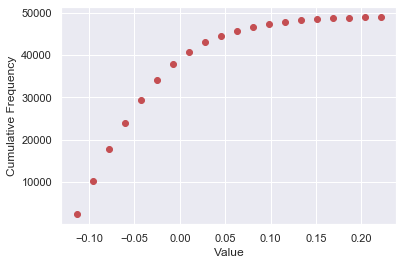

In [64]:
a = np.sort(df.loc[:,"THERM JUNE 2010"])[:49000]

data = a

counts, start, dx, _ = stats.cumfreq(data, numbins=20)
x = np.arange(counts.size) * dx + start

plt.plot(x, counts, 'ro')
plt.xlabel('Value')
plt.ylabel('Cumulative Frequency')

plt.show()

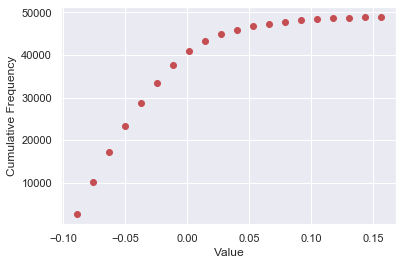

In [65]:
a = np.sort(df.loc[:,"THERM SEPTEMBER 2010"])[:49000]

data = a

counts, start, dx, _ = stats.cumfreq(data, numbins=20)
x = np.arange(counts.size) * dx + start

plt.plot(x, counts, 'ro')
plt.xlabel('Value')
plt.ylabel('Cumulative Frequency')

plt.show()

In [70]:
df1 = df.sample(20)
print(df1)


      COMMUNITY AREA NAME BUILDING TYPE BUILDING_SUBTYPE  THERM JANUARY 2010  \
26990      Lincoln Square   Residential    Single Family           -0.117172   
39085       South Chicago   Residential    Single Family           -0.100288   
32039            New City   Residential    Single Family            0.225342   
36266        Portage Park   Residential    Single Family            0.037914   
7227       Belmont Cragin   Residential        Multi < 7           -0.103968   
49788            Woodlawn   Residential        Multi < 7            0.006216   
34592        Norwood Park   Residential    Single Family           -0.131802   
40911      South Lawndale   Residential    Single Family           -0.003537   
33789      North Lawndale   Residential        Multi < 7           -0.032751   
3491       Auburn Gresham   Residential    Single Family            0.021444   
3560       Auburn Gresham   Residential    Single Family            0.067864   
43660      West Englewood   Residential 

In [24]:
df = pd.read_csv("Comm_Elect_Clean.csv")

In [26]:
np.sum(df.loc[:,"KWH JANUARY 2010"].isna())

0

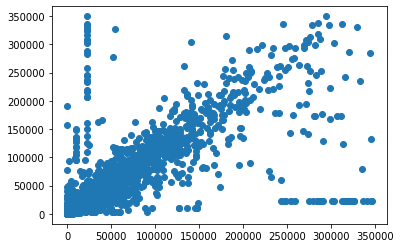

In [35]:
plt.scatter(df.loc[:,"KWH JANUARY 2010"],df.loc[:,"KWH SEPTEMBER 2010"])

In [2]:
tester = pd.read_csv("Comm_Therm_Clean.csv")
tester = tester.fillna(0)
tester
tester.to_csv("Comm_Therm_Clean.csv")

In [4]:
df = pd.read_csv("Comm_Therm_Clean.csv")

In [12]:
a = np.corrcoef(df.loc[:,"THERM JANUARY 2010"],df.loc[:,"TOTAL THERMS"])
a

array([[1.        , 0.44992478],
       [0.44992478, 1.        ]])

In [14]:
df1 = pd.read_csv("Comm_Elect_Clean.csv")
np.corrcoef(df.loc[:,"THERM JANUARY 2010"],df1.loc[:,"KWH JANUARY 2010"])

array([[1.        , 0.45346892],
       [0.45346892, 1.        ]])

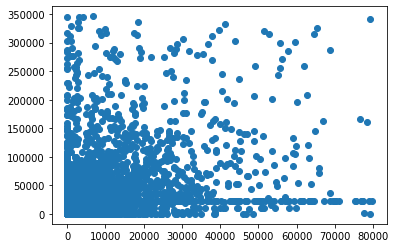

In [24]:
plt.scatter(df.loc[:,"THERM JANUARY 2010"],df1.loc[:,"KWH JANUARY 2010"])